In [ ]:
"""
다항식의 계수간 상호작용을 통해 새로운 feature 를 생성합니다.
예를들면, [a,b] 2개의 feature가 존재한다 가정하고,
degree = 2로 설정힌다면 polynomial feautures는 [1,a,b,a^2,ab,b^2] 가 됩니다
"""

In [23]:
from sklearn.datasets import load_boston
data = load_boston()

df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['MEDV'] = data['target']
x_train, x_valid, y_train, y_valid = train_test_split(df.drop('MEDV',1), df['MEDV'])

#모델별 성능 확인을 위한 함수

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_valid})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [5]:
poly = PolynomialFeatures(degree = 2, include_bias=False)

In [11]:
poly_features = poly.fit_transform(x_train)[0]

In [8]:
poly_features

array([[     0.24522,      0.     ,      9.9    , ..., 157529.61   ,
          6326.586  ,    254.0836 ],
       [     4.83567,      0.     ,     18.1    , ..., 150714.7684 ,
          4445.119  ,    131.1025 ],
       [     1.80028,      0.     ,     19.58   , ...,  51806.3121 ,
          2763.1854 ,    147.3796 ],
       ...,
       [     0.09068,     45.     ,      3.44   , ..., 142642.1824 ,
          1926.168  ,     26.01   ],
       [     0.01439,     60.     ,      2.93   , ..., 141902.89   ,
          1649.946  ,     19.1844 ],
       [     0.17134,      0.     ,     10.01   , ..., 118962.9081 ,
          5435.7816 ,    248.3776 ]])

In [9]:
x_train.iloc[0]

CRIM         0.24522
ZN           0.00000
INDUS        9.90000
CHAS         0.00000
NOX          0.54400
RM           5.78200
AGE         71.70000
DIS          4.03170
RAD          4.00000
TAX        304.00000
PTRATIO     18.40000
B          396.90000
LSTAT       15.94000
Name: 317, dtype: float64

In [25]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2 , include_bias= False),
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio=0.2)
)

In [28]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_valid)

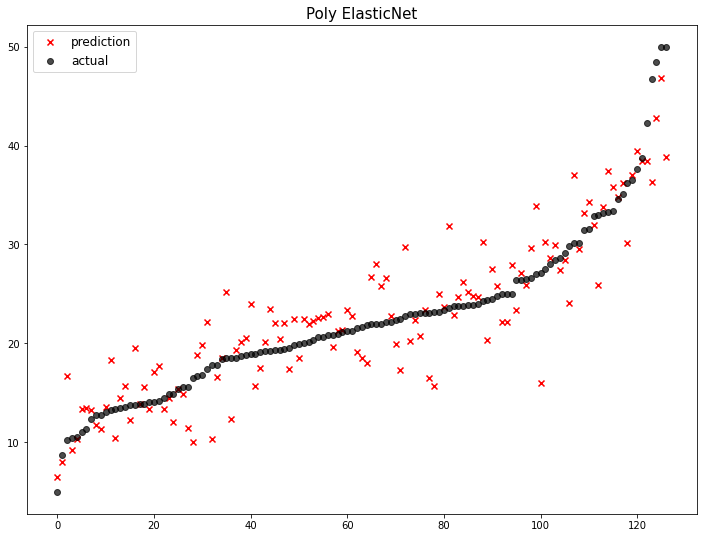

             model        mse
0  Poly ElasticNet  13.523376


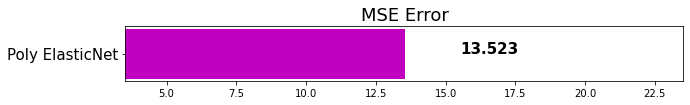

In [29]:
mse_eval('Poly ElasticNet', poly_pred, y_valid)